# Car Price Case Study - Multiple Linear Regression

**Instructions to run the code**
    
    1. Do not alter any file name.
    2. Keep the folder structure intact.
    3. Keep all the files in folder where python notebook is located.
    4. Few verification steps are purposely added. Uncomment them and execute as and when required.</font>

**Folder Structure**  <br>
```Linear Regression - Car Prices``` #Main Folder
>```CarPrice_Assignment.csv``` #Data file<br>

<font color=blue> **Read Data**	<br>
* Import important libraries	<br>
* Read application data file into dataframe	<br>
* Shape of car_data dataframe	<br>
* Quick review of car_data dataframe	<br>
	
**Data Cleaning**	<br>
* Analyze columns for missing values in car_data	<br>
* Split CarName into Name and Model	<br>
* Check data for any discrepancy	<br>
* Correct car company name	<br>
	
**Univariate Analysis**	<br>
* Analyze outliers from quantitative variables	<br>
* Remove outliers from car_data	<br>
* Bar plots of quantitative variables vs price	<br>
	
**Segmented Univariate Analysis**	<br>
* Analyze impact of categorical values on price of car	<br>
	
**Bivariate Analysis**	<br>
* Checking correlation of quantitative variables in car_data	<br>
	
**Feature Engineering**	<br>
* Create new variable lbh = length * width * height	<br>
* Create new variable hplevel (horsepower level)	<br>
* Create new variable citympg (citympg level)	<br>
* Create new variable powtoweight = horsepower/weight	<br>
* Create new variable lwratio = carlength/carwidth	<br>
* Create new variable lhratio = carheight/carlength	<br>
	
**Data Preparation for Modeling**	<br>
* Drop car_id and CarName	<br>
* Label encoding for doornumber and cylindernumber	<br>
* Dummy variable encoding (one-hot) for other categorical variables	<br>
* Splitting the Data into Training and Testing Sets	<br>
* Scaling the variables using MinMaxScaler (Normalizing)	<br>
	
**Model Building**	<br>
* Create X and y sets	<br>
* Using RFE for feature selection	<br>
* Build model1 thru model7	<br>
* Residual Analysis - Distribution of error terms	<br>
	
**Evaluation of Model**	<br>
* Transform/scale test dataframe	<br>
* Prediction on test set	<br>
* Calculate r2 for test set	<br>
	
**Conclusion**	<br>

#### Import important libraries

In [1]:
import numpy as np
import pandas as pd

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Ignore future warnings
warnings.simplefilter('ignore', FutureWarning)

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for data modelling
import sklearn
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

###  Read Data

#### Read car data file into dataframe

In [2]:
car_data = pd.read_csv(r"./CarPrice_Assignment.csv")
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### Shape of car_data dataframe

In [3]:
# Shape of dataframe
car_data.shape

(205, 26)

#### Quick review of car_data dataframe

In [4]:
# Review dataframe columns
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

### Data Cleaning

#### Analyze columns for missing values in car_data

In [5]:
# Check for missing values
car_data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

****Observation**** - There are no missing values

#### Split CarName into Name and Model

In [6]:
car_data["carcompany"] = car_data["CarName"].apply(lambda c:c.split(" ")[0])
car_data["carmodel"] = car_data["CarName"].apply(lambda c:" ".join(c.split(" ")[1:]))
car_data.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carcompany,carmodel
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


#### Check data for any discrepancy

In [7]:
car_data["carcompany"].value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
volvo          11
peugeot        11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         4
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
vw              2
maxda           2
renault         2
vokswagen       1
Nissan          1
toyouta         1
mercury         1
porcshce        1
Name: carcompany, dtype: int64

#### Correct car company name
#### We need to perform below data cleaning because of spelling in carcompany 
1. maxda = mazda
2. vw = volkswagen
3. vokswagen = volkswagen      
4. toyouta = toyota
5. Nissan = nissan
6. porcshce = porsche

In [8]:
# Correct car company name
car_data.loc[car_data["carcompany"]=="maxda","carcompany"]="mazda"
car_data.loc[car_data["carcompany"]=="vw","carcompany"]="volkswagen"
car_data.loc[car_data["carcompany"]=="vokswagen","carcompany"]="volkswagen"
car_data.loc[car_data["carcompany"]=="toyouta","carcompany"]="toyota"
car_data.loc[car_data["carcompany"]=="Nissan","carcompany"]="nissan"
car_data.loc[car_data["carcompany"]=="porcshce","carcompany"]="porsche"

In [9]:
# Rechaek car company count
car_data["carcompany"].value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
renault         2
mercury         1
Name: carcompany, dtype: int64

In [10]:
# Let's check car company and model where count is less than 5
# 
s1 = car_data["carcompany"].value_counts()<5
comp2check = list(s1[s1.values==True].index)

car_data[car_data["carcompany"].isin(comp2check)][["CarName","carcompany","carmodel"]]

,CarName,carcompany,carmodel
0,alfa-romero giulia,alfa-romero,giulia
1,alfa-romero stelvio,alfa-romero,stelvio
2,alfa-romero Quadrifoglio,alfa-romero,Quadrifoglio
18,chevrolet impala,chevrolet,impala
19,chevrolet monte carlo,chevrolet,monte carlo
20,chevrolet vega 2300,chevrolet,vega 2300
43,isuzu MU-X,isuzu,MU-X
44,isuzu D-Max,isuzu,D-Max
45,isuzu D-Max V-Cross,isuzu,D-Max V-Cross
46,isuzu D-Max,isuzu,D-Max


## Univariate Analysis

#### Create list of numeric and non-numeric columns which will be used later for analysis

In [11]:
numcols = list(car_data.select_dtypes(exclude="object").columns)
non_numcols = list(car_data.select_dtypes(include="object").columns)

In [12]:
# Remove carmodel from analysis since there are too many values to plot
num2anz =  numcols.copy()
num2anz.remove("car_ID")
num2anz

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

#### Analyze outliers from quantitative variables

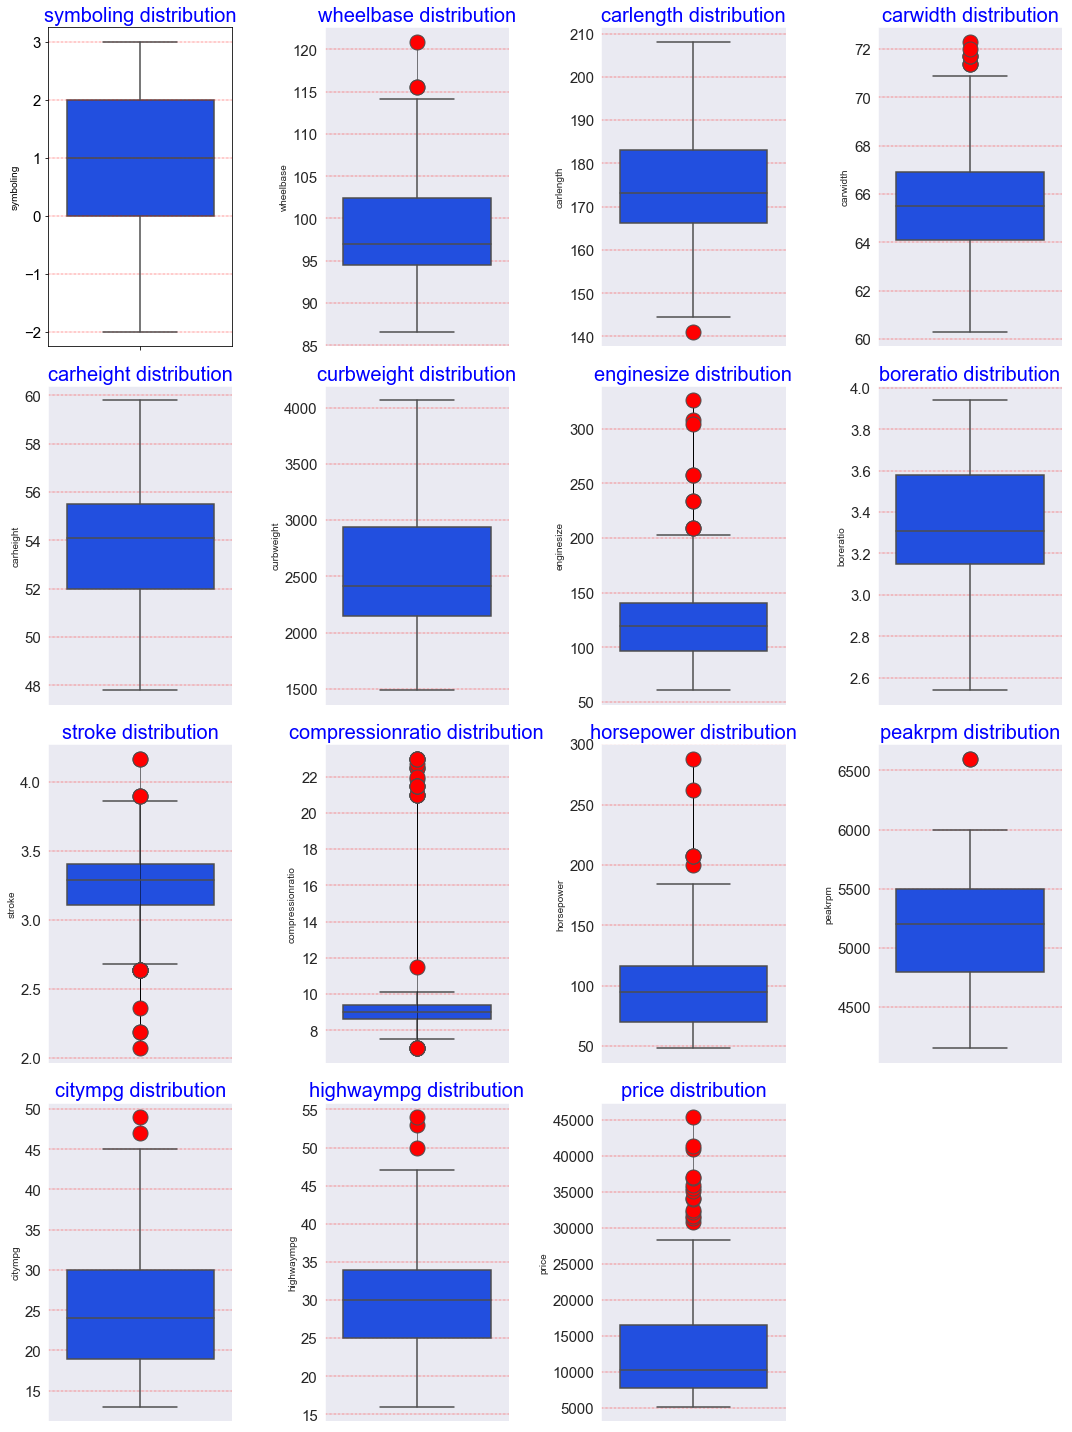

In [13]:
# Plot barplots
ln=len(num2anz)

# calculation for subplots
n=4
m=(ln//n)+1
ct=1

# Sort dataframe by price    
car_byprice = car_data.sort_values(by="price")

# Setting figure size
# plt.figure(2,figsize=(25,30))
plt.figure(2,figsize=(15,20))

for cat in num2anz:
    plt.subplot(m,n,ct)
    sns.set_style("dark")
    plt.grid(color='r', linestyle='-.', linewidth=0.4)
    flierprops = dict(marker='o',markerfacecolor='red', markersize=15,linewidth=0.5,
                linestyle='-')
    
    sns.boxplot(y=car_byprice[cat],palette="bright",flierprops=flierprops)
    title = cat + " distribution"
    plt.title(title,color="b",fontsize=20)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15,rotation=90)
    ct+=1
    
# plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [14]:
# Checking stats for outliers
car_data[num2anz].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
90%,3.000000,107.900000,188.800000,68.640000,56.620000,3230.000000,181.000000,3.672000,3.540000,10.940000,160.000000,5780.000000,31.600000,38.000000,22563.000000
95%,3.000000,110.000000,196.360000,70.460000,57.500000,3503.000000,201.200000,3.780000,3.640000,21.820000,180.800000,5980.000000,37.000000,42.800000,32472.400000
99%,3.000000,115.544000,202.480000,71.700000,59.100000,3948.000000,302.160000,3.800000,3.900000,23.000000,207.000000,6000.000000,44.720000,49.880000,40802.720000


#### Remove outliers from car_data

In [15]:
outlier_list = ["citympg","highwaympg"]

print("Shape before removing outlier: ", car_data.shape)
## Remove Outliers from application_clean
np.warnings.filterwarnings('ignore')

# Calculate Inter Quantile Region (75th Percentile - 25th Percentile)
# Upper cutoff = 75th percentile + 1.5 * (IQR)
# Lower cutoff = 25th percentile - 1.5 * (IQR)

def removeoutlier(car_data1,col):

    col_q1,col_q3,_col_IQR,lower_cutoff,upper_cutoff = 0,0,0,0,0
    data=pd.DataFrame()
    outlier_data=pd.DataFrame()
    data=car_data1[col]

    col_q1 = data.quantile(q=.25)
    col_q3 = data.quantile(q=.75)
    col_IQR = col_q3 - col_q1
    lower_cutoff = col_q1 - (1.5 * col_IQR)
    upper_cutoff = col_q3 + (1.5 * col_IQR)
    mask1 = (car_data1[col] > lower_cutoff) & (car_data1[col] < upper_cutoff)
    mask2 = (car_data1[col].isnull()==True)
    if(lower_cutoff==0) | (upper_cutoff==0) | (lower_cutoff == upper_cutoff):
        return car_data1
        pass
    else:
        car_data1 = car_data1[mask1 | mask2]
        return car_data1


# # Running in loop to plot all columns as subplot
# We will not remove outliers from "DAYS_EMPLOYED"


for column in outlier_list:
    car_data = removeoutlier(car_data,column)

# application_clean2 = removeoutlier(application_clean2,col)
np.warnings.filterwarnings('default')

print("Shape after removing outlier: ", car_data.shape)

Shape before removing outlier:  (205, 28)
Shape after removing outlier:  (202, 28)


#### Note -
1. We are not removing outliers from all the variables since it results in significant loss of data. Quick analysis indicated 25% loss in data.
2. Removing outliers from key columns results in loosing levels of categorical variables.

#### Bar plots of quantitative variables vs price

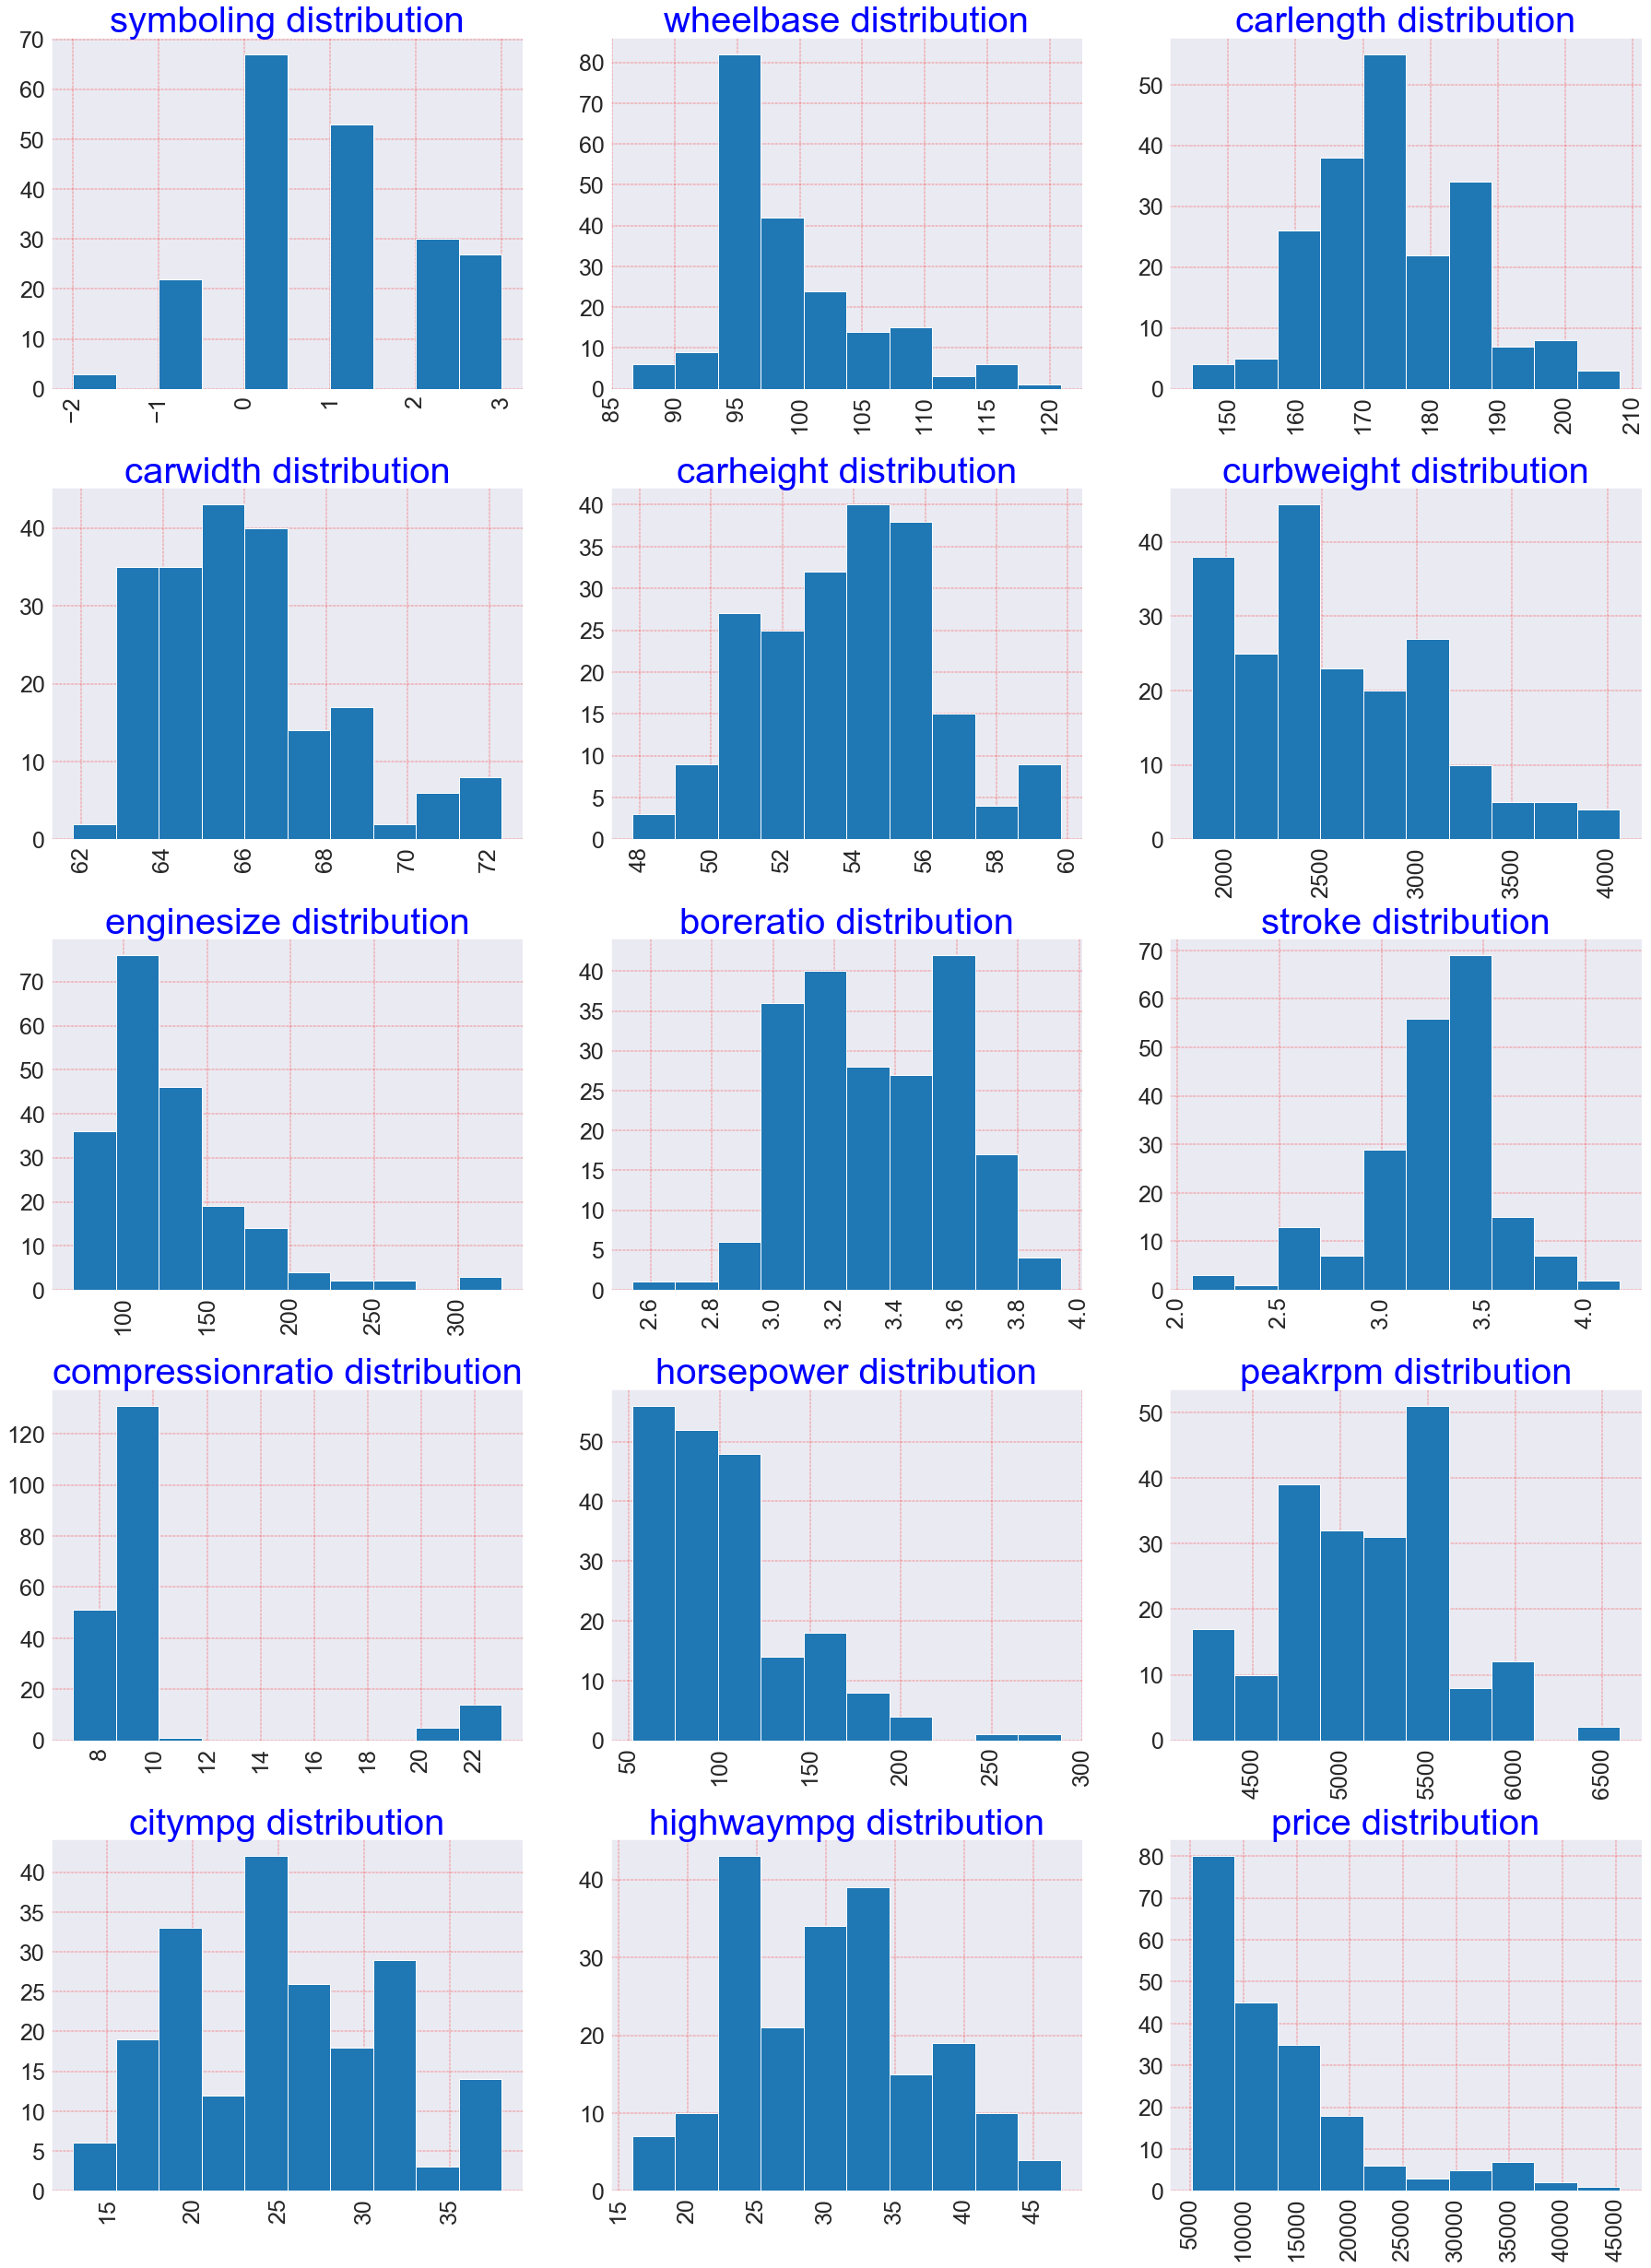

In [16]:
# Plot barplots
ln=len(num2anz)

# calculation for subplots
n=3
m=(ln//n)+1
ct=1

# Sort dataframe by price    
car_byprice = car_data.sort_values(by="price")

# Setting figure size
plt.figure(2,figsize=(25,40))

for cat in num2anz:
    plt.subplot(m,n,ct)
    sns.set_style("dark")
    plt.grid(color='r', linestyle='-.', linewidth=0.4)
    x=car_byprice[cat]

    plt.hist(x)
    title = cat + " distribution"
    plt.title(title,color="b",fontsize=40)
    plt.yticks(fontsize=25)
    plt.xticks(fontsize=25,rotation=90)
    ct+=1
    
# plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

## Segmented Univariate Analysis

In [17]:
# Remove CarName and carmodel from analysis since there are too many values to plot
nonnum2anz =  non_numcols.copy()
nonnum2anz.remove("CarName")
nonnum2anz.remove("carmodel")
nonnum2anz

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'carcompany']

#### Analyze impact of categorical values on price of car

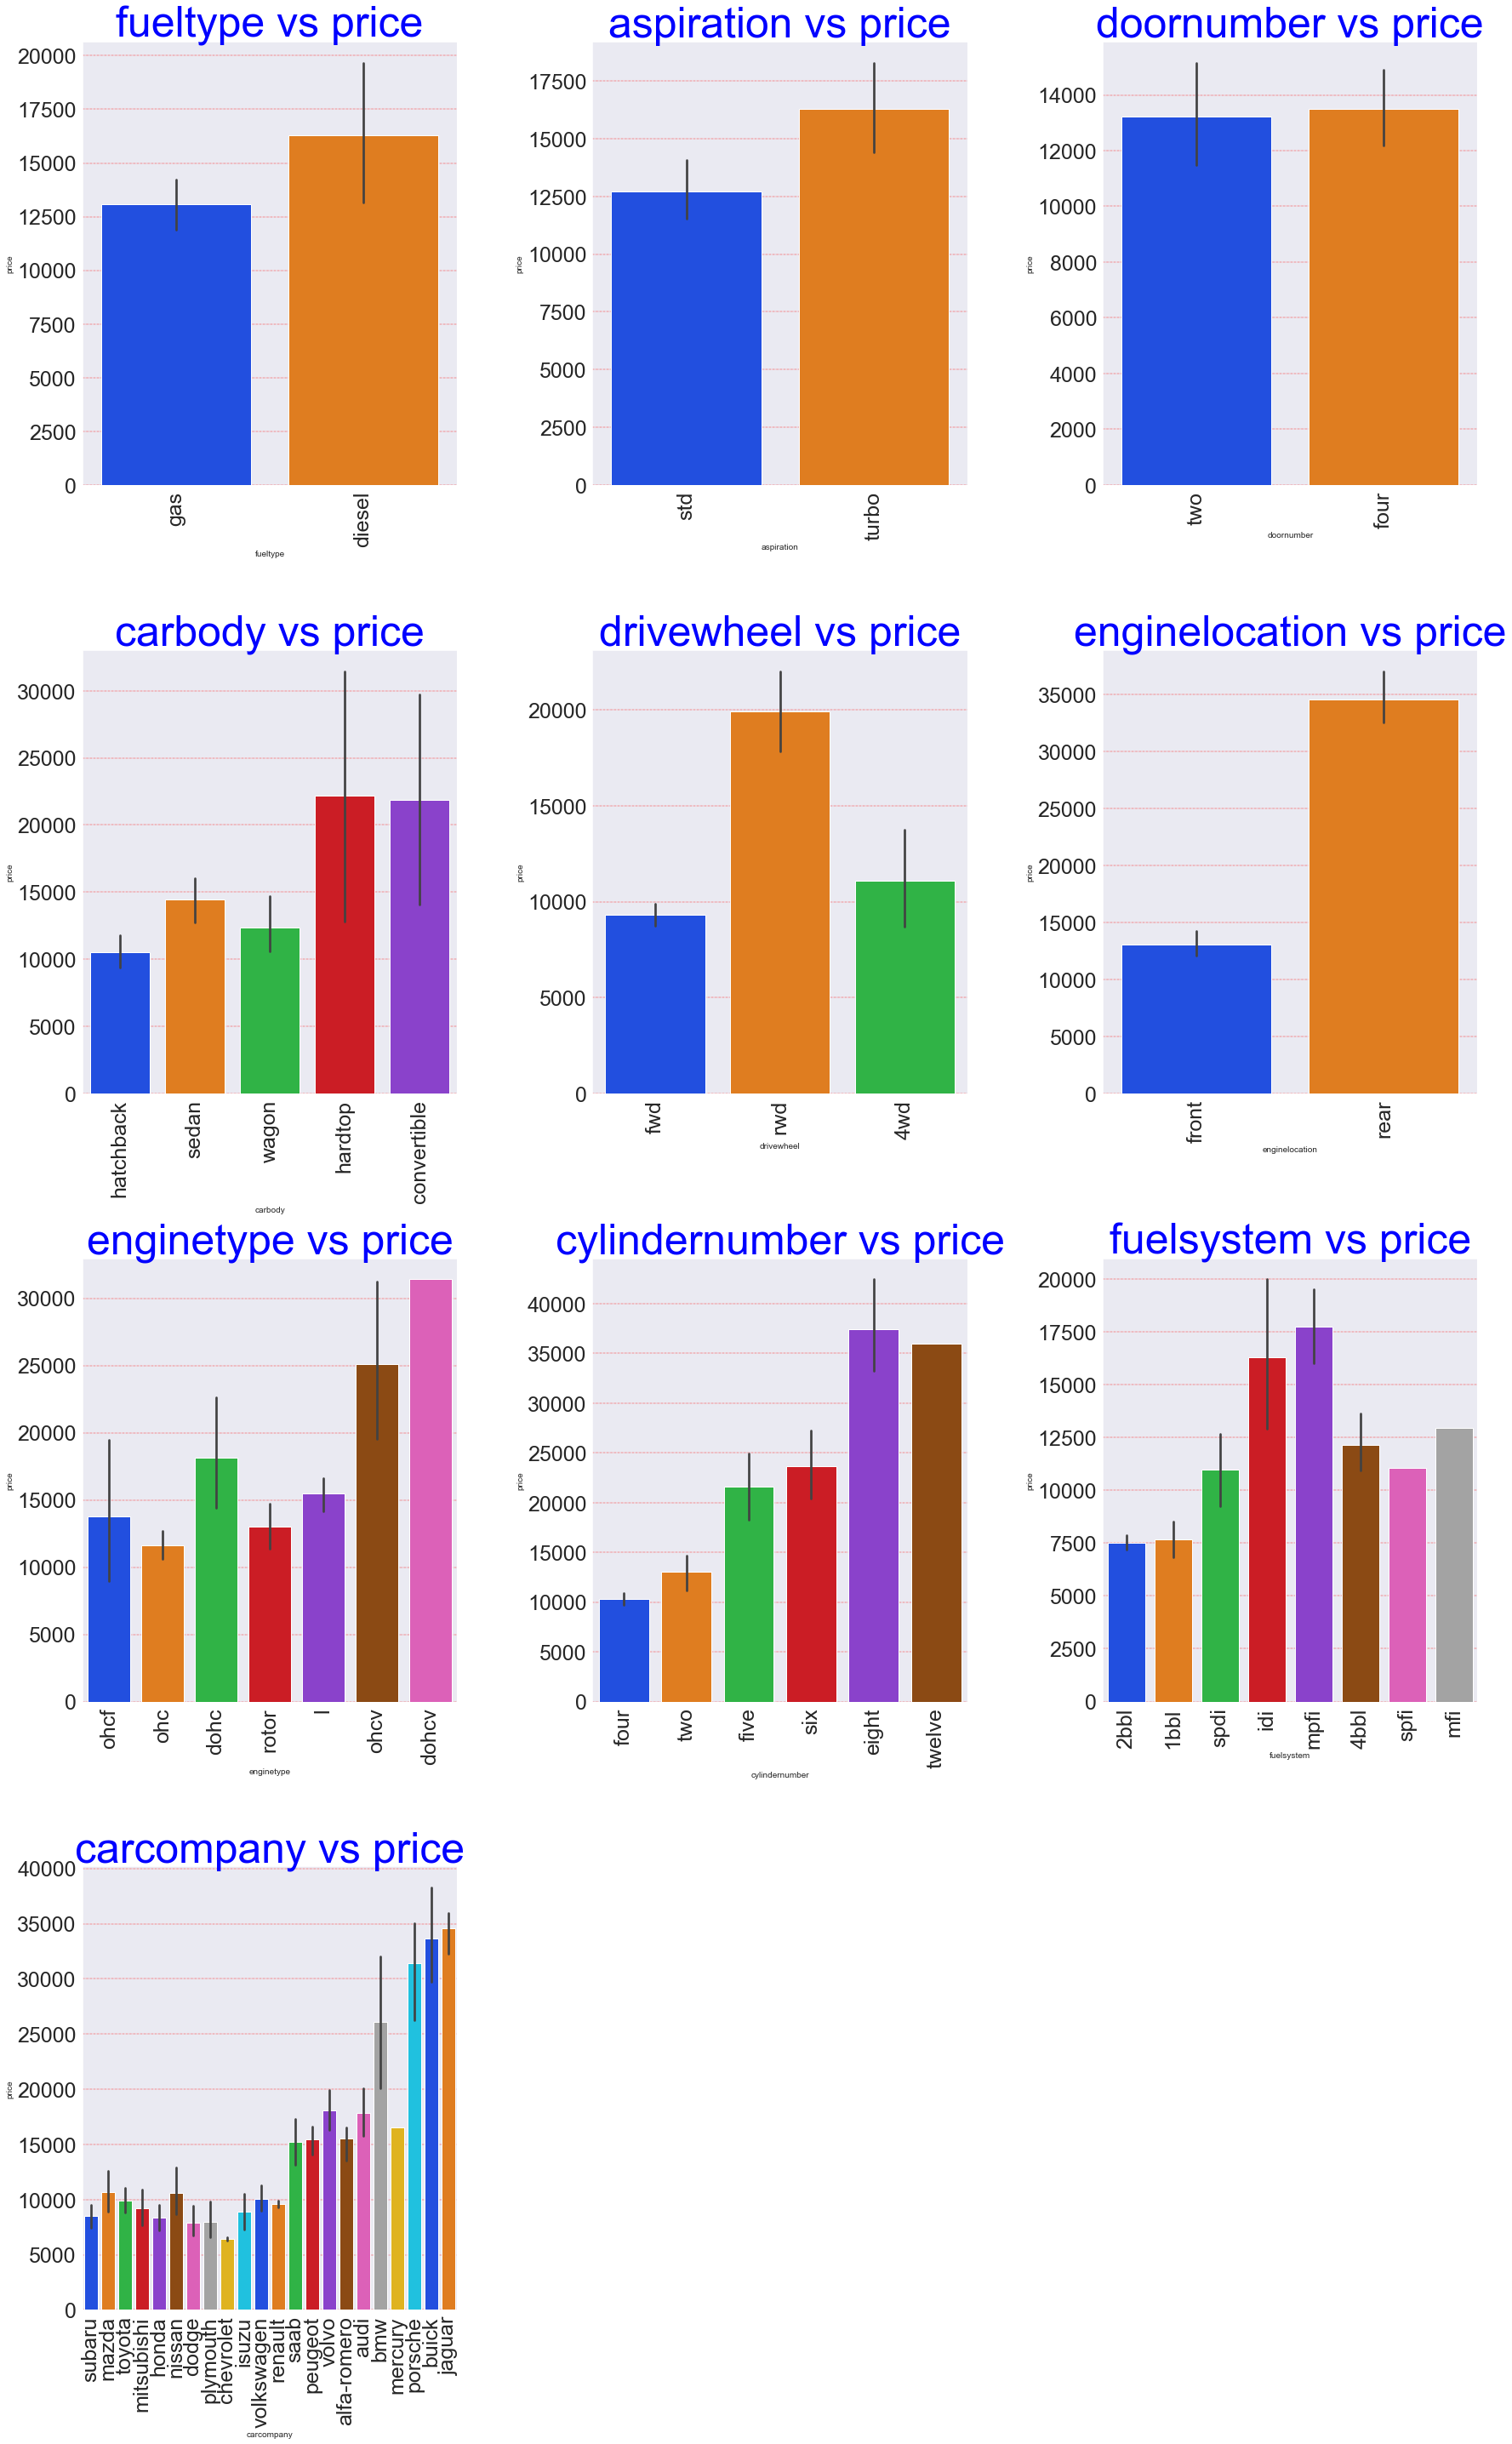

In [18]:
# Plot barplots
ln=len(nonnum2anz)

# calculation for subplots
n=3
m=(ln//n)+1
ct=1

# Sort dataframe by price    
car_byprice = car_data.sort_values(by="price")

# Setting figure size
plt.figure(2,figsize=(25,40))

for cat in nonnum2anz:
    plt.subplot(m,n,ct)
    sns.set_style("dark")
    plt.grid(color='r', linestyle='-.', linewidth=0.4)

    sns.barplot(x=cat,y="price",data=car_byprice,palette="bright")
    title = cat + " vs price"
    plt.title(title,color="b",fontsize=50)
    plt.yticks(fontsize=25)
    plt.xticks(fontsize=25,rotation=90)
    ct+=1
    
# plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

#### Observations
1. aspiration - turbo car costlier than standard car
2. driewheel - rear wheel drive costlier than otherr categories
3. enginelocation - rear engine location is thrice as costlier as front
4. enginetype - dohcv are significant costlier
5. Generally as cylinder number increases the price increases
6. bmw, mercury, porsche, buick and jaguar are costlier car.


#### Checking correlation of quantitative variables in car_data

Text(0.5, 1.0, 'Pearson Correlation of Features')

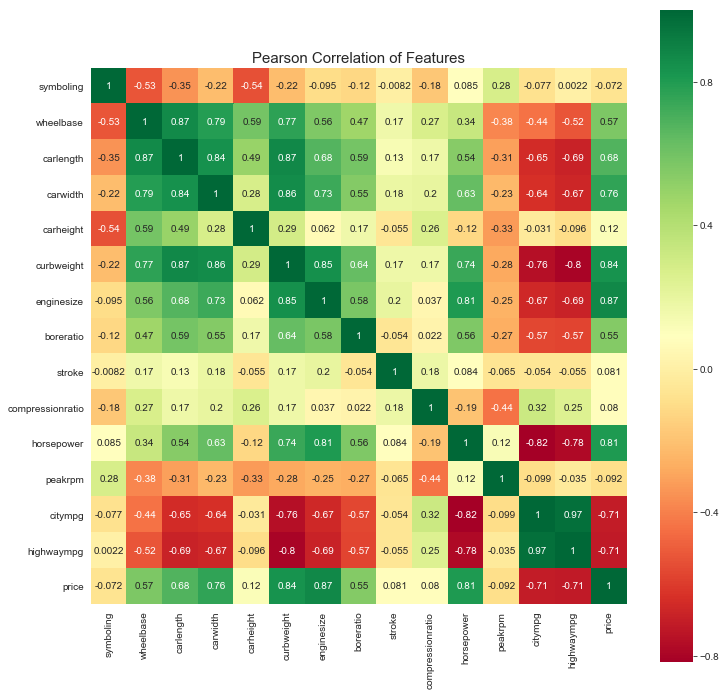

In [19]:
plt.figure(4,figsize=(12,12))
corr1 = car_data[num2anz].corr()
sns.heatmap(corr1,annot=True,cmap="RdYlGn",square=True)
plt.title('Pearson Correlation of Features', size=15)

#### Observation - There are variables with high correlationship. We will have to ensure predictors are selected with introducing multicollinearity

#### Observations
1. Wheelbase, carlength, carwidth and curweigth are highly correlated
2. citympg and highwaympg are highly correlated
3. curbweight, Enginesize and boreratio are highly correlated
4. citympg/highwaympg have strong negative correlation with carlength, carwidtht, curbweight, enginesize, boreratio

#### Pairplots for numerical variables to understand linear relationship

In [20]:
num2anz1 = ['symboling', 'wheelbase','carlength','carwidth','carheight','curbweight','price']
num2anz2 = ['enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

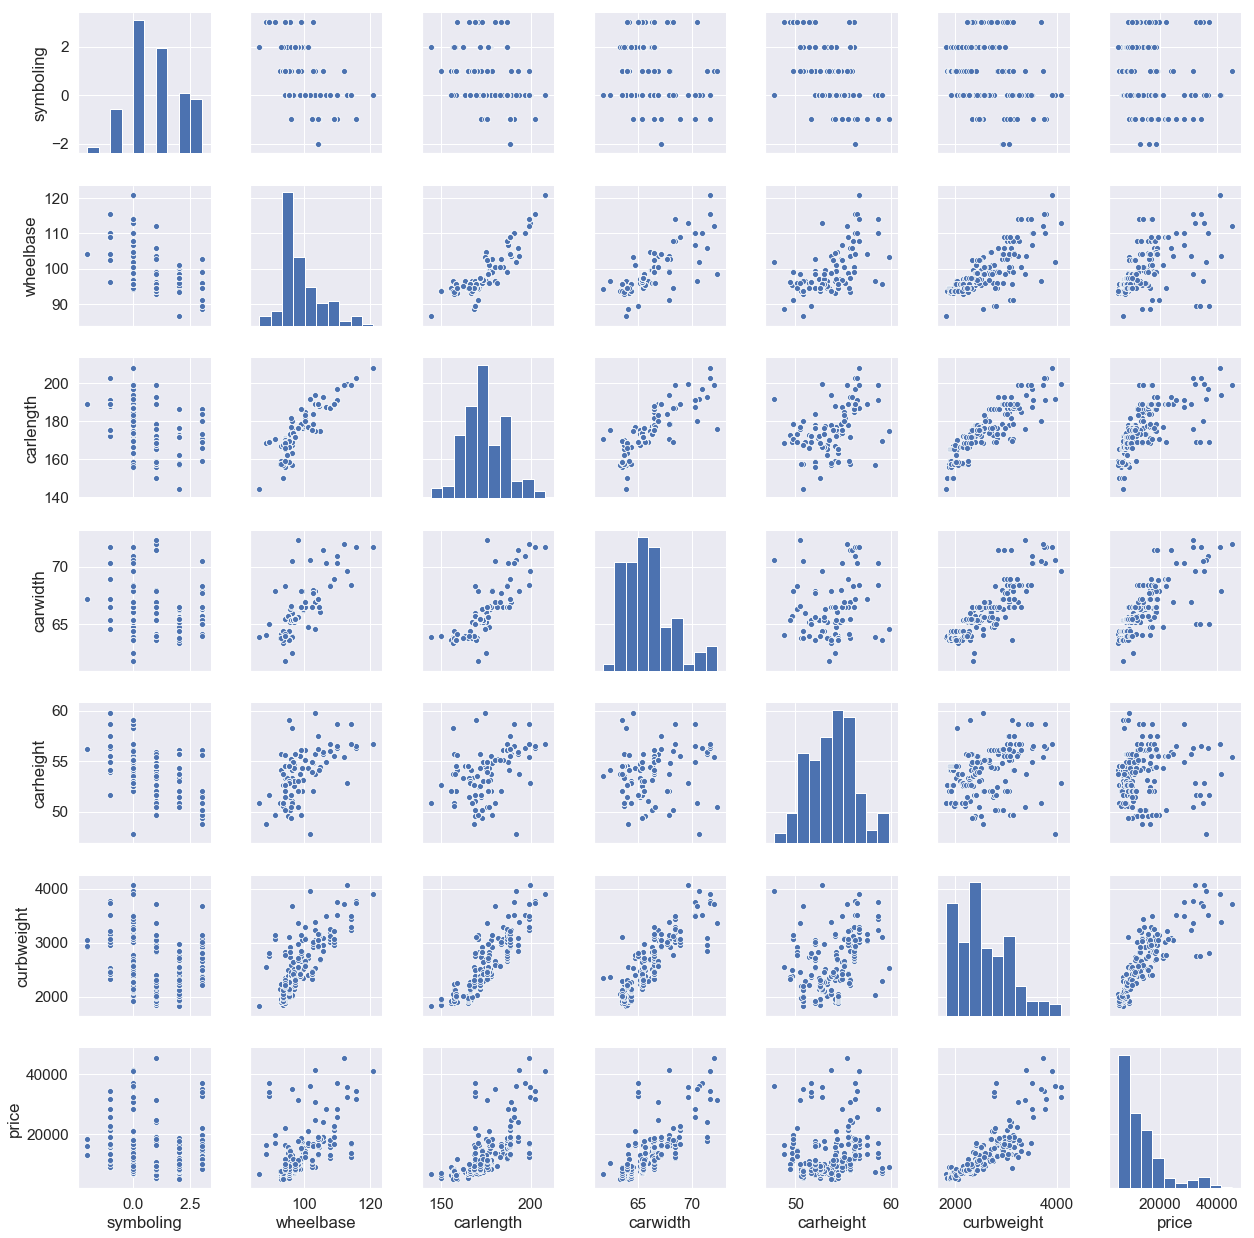

In [21]:
sns.set(font_scale=1.4)
sns.pairplot(car_data[num2anz1],palette="bright")

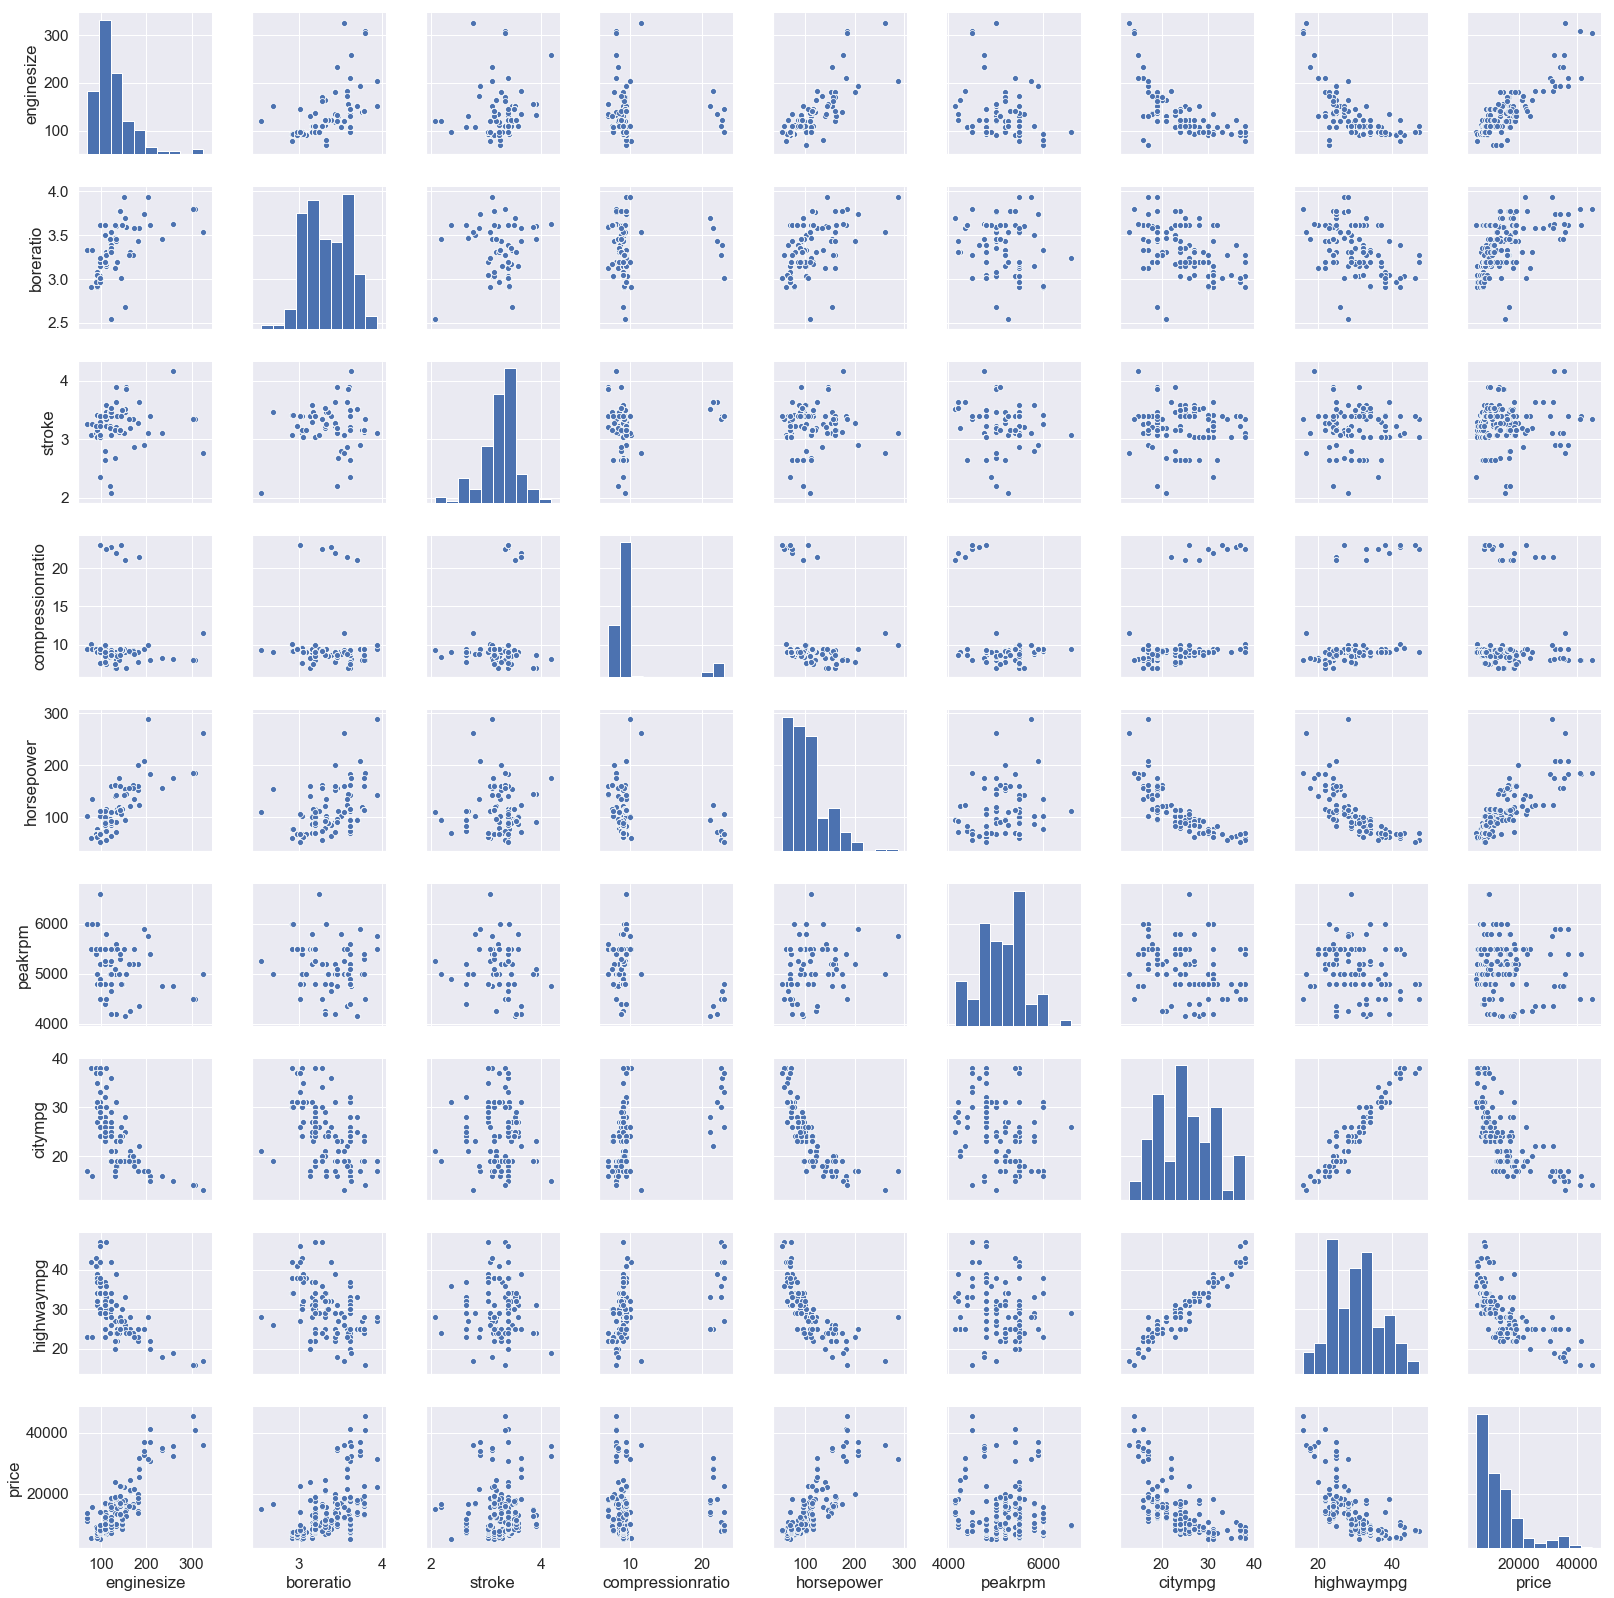

In [22]:
sns.set(font_scale=1.4)
sns.pairplot(car_data[num2anz2],palette="husl")

## Feature engineering - 
#### Create new variable lbh = length * width * height

In [23]:
car_data["lbh"] = car_data["carlength"]*car_data["carwidth"]*car_data["carheight"]
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carcompany,carmodel,lbh
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia,528019.904
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio,528019.904
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio,587592.640
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls,634816.956
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500,18,22,17450.0,audi,100ls,636734.832


#### Create new variable hplevel (horsepower level)
4 - Very High
3 - High
2 - Medium
1 - Low

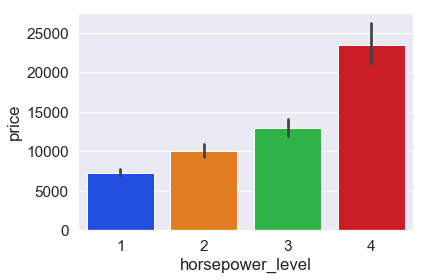

In [24]:
# Define hp level
def hpmap(n):
    if(n>116):
        return 4
    elif(n>95):
        return 3
    elif(n>70):
        return 2
    else:
        return 1

# Create new column for hp level
car_data["horsepower_level"]=car_data["horsepower"].apply(hpmap)

# Quick review of distribution of horsepower
sns.barplot(car_data["horsepower_level"],car_data["price"],palette="bright")

#### Create new variable citympg (citympg level)
4 - Very High
3 - High
2 - Medium
1 - Low

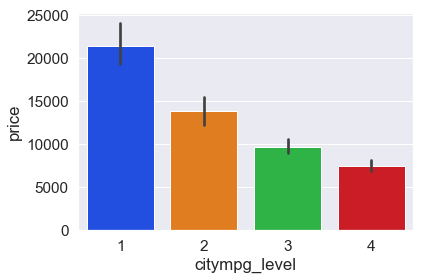

In [25]:
# Define hp level
def mpgmap(n):
    if(n>30):
        return 4
    elif(n>24):
        return 3
    elif(n>19):
        return 2
    else:
        return 1

# Create new column for hp level
car_data["citympg_level"]=car_data["citympg"].apply(mpgmap)

# Quick review of distribution of horsepower
sns.barplot(car_data["citympg_level"],car_data["price"],palette="bright")

#### Create new variable powtoweight = horsepower/weight

In [26]:
# car_data.info()
car_data["powtoweight"]=car_data["horsepower"]/car_data["curbweight"]
car_data["powtoweight"].describe()

count    202.000000
mean       0.040196
std        0.009572
min        0.019936
25%        0.034367
50%        0.037961
75%        0.044609
max        0.085561
Name: powtoweight, dtype: float64

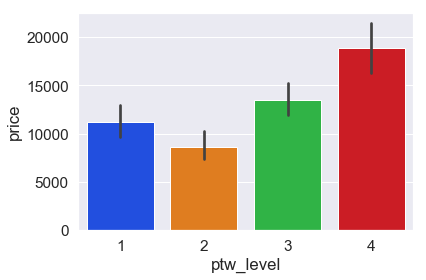

In [27]:
# Define hp level
def ptwmap(n):
    if(n>0.044):
        return 4
    elif(n>0.037):
        return 3
    elif(n>0.034):
        return 2
    else:
        return 1

# Create new column for hp level
car_data["ptw_level"]=car_data["powtoweight"].apply(ptwmap)

# Quick review of distribution of horsepower
sns.barplot(car_data["ptw_level"],car_data["price"],palette="bright")

#### Create new variable lwratio = carlength/carwidth
#### Create new variable lhratio = carheight/carlength

In [28]:
car_data["lwratio"] = car_data["carlength"]/car_data["carwidth"]
car_data["hlratio"] = car_data["carheight"]/car_data["carlength"]
car_data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,price,carcompany,carmodel,lbh,horsepower_level,citympg_level,powtoweight,ptw_level,lwratio,hlratio
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,13495.000,alfa-romero,giulia,528019.904,3,2,0.043564,3,2.633385,0.289100
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,16500.000,alfa-romero,stelvio,528019.904,3,2,0.043564,3,2.633385,0.289100
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,16500.000,alfa-romero,Quadrifoglio,587592.640,4,1,0.054552,4,2.613740,0.306075
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,13950.000,audi,100 ls,634816.956,3,2,0.043646,3,2.667674,0.307475
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,17450.000,audi,100ls,636734.832,3,1,0.040722,3,2.659639,0.307475
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,15250.000,audi,fox,624189.969,3,1,0.043877,3,2.674208,0.299492
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,17710.000,audi,100ls,766364.046,3,1,0.038678,3,2.698880,0.289050
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,18920.000,audi,5000,766364.046,3,1,0.037238,3,2.698880,0.289050
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,23875.000,audi,4000,769115.802,4,1,0.045366,4,2.698880,0.290088
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,17859.167,audi,5000s (diesel),629188.560,4,1,0.052407,4,2.624448,0.291807


## Data preparation for modeling

In [29]:
# Creating a copy of original dataframe. We will not touch original dataframe
car_data_model = car_data.copy()

#### Drop car_id and CarName

In [30]:
car_data_model.drop(["car_ID","CarName", "carmodel"],axis=1,inplace=True)
car_data_model.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,highwaympg,price,carcompany,lbh,horsepower_level,citympg_level,powtoweight,ptw_level,lwratio,hlratio
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,27,13495.0,alfa-romero,528019.904,3,2,0.043564,3,2.633385,0.289100
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,27,16500.0,alfa-romero,528019.904,3,2,0.043564,3,2.633385,0.289100
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,26,16500.0,alfa-romero,587592.640,4,1,0.054552,4,2.613740,0.306075
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,30,13950.0,audi,634816.956,3,2,0.043646,3,2.667674,0.307475
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,22,17450.0,audi,636734.832,3,1,0.040722,3,2.659639,0.307475


Check if there is any columns with only 1 unique value, if so we will delete it.

In [31]:
nonnumcols = list(car_data_model.select_dtypes(include="object").columns)

print(car_data_model[nonnumcols].nunique())

fueltype           2
aspiration         2
doornumber         2
carbody            5
drivewheel         3
enginelocation     2
enginetype         7
cylindernumber     6
fuelsystem         8
carcompany        22
dtype: int64


#### Label encoding for doornumber and cylindernumber

In [32]:
# Create mapping for numbers
num_mapping = {"two":2, "three":3, "four":4,"five":5, "six":6,"eight":8, "twelve":12}

car_data_model['doornumber'] = car_data_model['doornumber'].map(num_mapping)
car_data_model['cylindernumber'] = car_data_model['cylindernumber'].map(num_mapping)

In [33]:
car_data_model[nonnumcols].head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,carcompany
0,gas,std,2,convertible,rwd,front,dohc,4,mpfi,alfa-romero
1,gas,std,2,convertible,rwd,front,dohc,4,mpfi,alfa-romero
2,gas,std,2,hatchback,rwd,front,ohcv,6,mpfi,alfa-romero
3,gas,std,4,sedan,fwd,front,ohc,4,mpfi,audi
4,gas,std,4,sedan,4wd,front,ohc,5,mpfi,audi


#### Dummy variable encoding (one-hot) for other categorical variables

In [34]:
# Let's drop the first column from status df using 'drop_first = True'
varlist =  ["fueltype","aspiration","carbody","drivewheel","enginelocation","enginetype","fuelsystem","carcompany"]

car_data_model = pd.get_dummies(car_data_model,columns=varlist, drop_first = True)

In [35]:
car_data_model.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,carcompany_nissan,carcompany_peugeot,carcompany_plymouth,carcompany_porsche,carcompany_renault,carcompany_saab,carcompany_subaru,carcompany_toyota,carcompany_volkswagen,carcompany_volvo
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,0,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,0,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,0,0,0,0,0,0,0,0,0,0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,0,0,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,0,0,0,0


#### Splitting the Data into Training and Testing Sets

In [36]:
car_train, car_test = train_test_split(car_data_model, train_size=0.70, test_size=0.30, random_state=100)
car_train.shape, car_test.shape

((141, 67), (61, 67))

#### Scaling the variables using MinMaxScaler (Normalizing)

In [37]:
col2scale = ["wheelbase","carlength","carlength","carheight","curbweight","carwidth",
             "enginesize","boreratio","stroke","compressionratio",
            "horsepower","peakrpm","citympg","highwaympg","lbh"]
scaler = MinMaxScaler()
# scaler = StandardScaler()

car_train[col2scale] = scaler.fit_transform(car_train[col2scale])
car_train.head()

C:\Users\rush2\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\rush2\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\rush2\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,carcompany_nissan,carcompany_peugeot,carcompany_plymouth,carcompany_porsche,carcompany_renault,carcompany_saab,carcompany_subaru,carcompany_toyota,carcompany_volkswagen,carcompany_volvo
1,3,2,0.000000,0.323580,0.163265,0.083333,0.318977,4,0.234375,0.664286,...,0,0,0,0,0,0,0,0,0,0
165,1,2,0.182663,0.321859,0.153061,0.400000,0.192014,4,0.109375,0.500000,...,0,0,0,0,0,0,0,1,0,0
197,-1,4,0.486068,0.667814,0.479592,0.808333,0.540601,4,0.277344,0.885714,...,0,0,0,0,0,0,0,0,0,1
169,2,2,0.303406,0.450947,0.316327,0.350000,0.320323,4,0.296875,0.771429,...,0,0,0,0,0,0,0,1,0,0
190,3,2,0.182663,0.270224,0.153061,0.300000,0.172275,4,0.152344,0.464286,...,0,0,0,0,0,0,0,0,1,0


## Model Building

#### Create X and y sets

In [38]:
# Create X and y
y_train = car_train.pop("price")
X_train = car_train

y_train.shape, X_train.shape

((141,), (141, 66))

In [39]:
X_train.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,carcompany_nissan,carcompany_peugeot,carcompany_plymouth,carcompany_porsche,carcompany_renault,carcompany_saab,carcompany_subaru,carcompany_toyota,carcompany_volkswagen,carcompany_volvo
1,3,2,0.000000,0.323580,0.163265,0.083333,0.318977,4,0.234375,0.664286,...,0,0,0,0,0,0,0,0,0,0
165,1,2,0.182663,0.321859,0.153061,0.400000,0.192014,4,0.109375,0.500000,...,0,0,0,0,0,0,0,1,0,0
197,-1,4,0.486068,0.667814,0.479592,0.808333,0.540601,4,0.277344,0.885714,...,0,0,0,0,0,0,0,0,0,1
169,2,2,0.303406,0.450947,0.316327,0.350000,0.320323,4,0.296875,0.771429,...,0,0,0,0,0,0,0,1,0,0
190,3,2,0.182663,0.270224,0.153061,0.300000,0.172275,4,0.152344,0.464286,...,0,0,0,0,0,0,0,0,1,0


#### <font color ="blue"> Based on EDA we know following: <br>
<font color ="blue"> 1. aspiration - turbo car costlier than standard car <br>
<font color ="blue"> 2. driewheel - rear wheel drive costlier than otherr categories <br>
<font color ="blue"> 3. enginelocation - rear engine location is thrice as costlier as front <br>
<font color ="blue"> 4. Generally as cylinder number increases the price increases <br>
<font color ="blue"> 5. bmw, mercury, porsche, buick and jaguar are costlier car <br>
#### <font color ="blue"> Correlation for following features: <br>
<font color ="blue"> 1. Wheelbase, carlength, carwidth and curweigth are highly correlated <br>
<font color ="blue"> 2. citympg and highwaympg are highly correlated <br>
<font color ="blue"> 3. curbweight, Enginesize and boreratio are highly correlated <br>
<font color ="blue"> 4. citympg/highwaympg have strong negative correlation with carlength, carwidtht, curbweight, enginesize, boreratio

#### Using RFE for feature selection
Recursive feature elimination

In [40]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [41]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [42]:
# Quick review of columns and ranking by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 41),
 ('doornumber', False, 43),
 ('wheelbase', False, 17),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', True, 1),
 ('curbweight', False, 22),
 ('cylindernumber', False, 39),
 ('enginesize', True, 1),
 ('boreratio', False, 10),
 ('stroke', False, 36),
 ('compressionratio', False, 4),
 ('horsepower', True, 1),
 ('peakrpm', False, 2),
 ('citympg', False, 32),
 ('highwaympg', False, 33),
 ('lbh', True, 1),
 ('horsepower_level', False, 35),
 ('citympg_level', False, 51),
 ('powtoweight', True, 1),
 ('ptw_level', False, 47),
 ('lwratio', True, 1),
 ('hlratio', True, 1),
 ('fueltype_gas', False, 6),
 ('aspiration_turbo', False, 29),
 ('carbody_hardtop', False, 48),
 ('carbody_hatchback', False, 31),
 ('carbody_sedan', False, 40),
 ('carbody_wagon', False, 38),
 ('drivewheel_fwd', False, 46),
 ('drivewheel_rwd', False, 37),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 5),
 ('enginetype_ohc', False, 44),
 (

In [43]:
col = list(X_train.columns[rfe.support_])
col

['carlength',
 'carwidth',
 'carheight',
 'enginesize',
 'horsepower',
 'lbh',
 'powtoweight',
 'lwratio',
 'hlratio',
 'enginelocation_rear',
 'enginetype_dohcv',
 'enginetype_ohcf',
 'enginetype_rotor',
 'carcompany_bmw',
 'carcompany_subaru']

#### Below function will create model and return summary and VIF details

In [44]:
# This functions return the model statistics and VIF for the independent variables.
def createmodel(features):
    selected_features=features
    
    X_train = car_train[selected_features]
    
    
    # Build model with selected features
    
    # Add constant
    X_train_sm = sm.add_constant(X_train)

    # Create object
    lr = sm.OLS(y_train,X_train_sm)

    # Fit model
    lr_model = lr.fit()

    # Summary
    print(lr_model.summary())
    print(" "*80)
    
    # VIF calculation
    vif = pd.DataFrame()
    vif["Feature"] = X_train.columns
    vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif["VIF"] = round(vif["VIF"],2)
    print(""*80)
    print(" "*10,"VIF Details"," "*10)
    print("="*80)
    print(vif)
    return X_train_sm,lr_model

#### <font color ="blue"> model1 (Initial features by RFE)

In [45]:
selected_features = ['wheelbase', 'carlength','carwidth','carheight',
                     'enginesize','boreratio','horsepower','powtoweight',
                     'lwratio','hlratio','enginetype_ohcv','enginetype_rotor',
                     'carcompany_jaguar','carcompany_mitsubishi','carcompany_renault']

X_train_sm, lr_model = createmodel(selected_features)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     77.09
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.03e-54
Time:                        09:05:35   Log-Likelihood:                -1311.8
No. Observations:                 141   AIC:                             2654.
Df Residuals:                     126   BIC:                             2698.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5.552e+

C:\Users\rush2\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\rush2\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1633: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Users\rush2\Anaconda3\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\rush2\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\rush2\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\rush2\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure

#### <font color=blue> **Observation**
<font color=blue>1. R2 = 0.895 <br>
<font color=blue>2. R2- Square = 0.884 <br>
<font color=blue>3. VIF = High VIF observed - Multicollinearity <br>
<font color=blue>4. r2_score (prediction) = Not calculated </font>

#### <font color ="blue"> model2

In [46]:
# Removing hlratio
selected_features = selected_features = ['wheelbase', 'carlength','carwidth','carheight',
                     'enginesize','boreratio','horsepower','powtoweight',
                     'lwratio','enginetype_ohcv','enginetype_rotor',
                     'carcompany_jaguar','carcompany_mitsubishi','carcompany_renault']

X_train_sm, lr_model = createmodel(selected_features)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     83.66
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.11e-55
Time:                        09:05:35   Log-Likelihood:                -1311.8
No. Observations:                 141   AIC:                             2652.
Df Residuals:                     127   BIC:                             2693.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  6.007e+

#### <font color=blue> **Observation**
<font color=blue>1. R2 = 0.895 <br>
<font color=blue>2. R2- Square = 0.885 <br>
<font color=blue>3. VIF = High VIF observed - Multicollinearity <br>
<font color=blue>4. r2_score (prediction) = Not calculated </font>

#### <font color ="blue"> model3

In [47]:
# Removing lwratio
selected_features = ['wheelbase', 'carlength','carwidth','carheight',
                     'enginesize','boreratio','horsepower','powtoweight',
                     'enginetype_ohcv','enginetype_rotor',
                     'carcompany_jaguar','carcompany_mitsubishi','carcompany_renault']

X_train_sm, lr_model = createmodel(selected_features)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     83.93
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.36e-54
Time:                        09:05:35   Log-Likelihood:                -1317.1
No. Observations:                 141   AIC:                             2660.
Df Residuals:                     128   BIC:                             2699.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  7098.58

#### <font color=blue> **Observation**
<font color=blue>1. R2 = 0.887 <br>
<font color=blue>2. R2- Square = 0.877 <br>
<font color=blue>3. VIF = High VIF observed - Multicollinearity <br>
<font color=blue>4. r2_score (prediction) = Not calculated </font>

#### <font color ="blue"> model4

In [48]:
# Removing carheight
selected_features = ['wheelbase', 'carlength','carwidth',
                     'enginesize','boreratio','horsepower','powtoweight',
                     'enginetype_ohcv','enginetype_rotor',
                     'carcompany_jaguar','carcompany_mitsubishi','carcompany_renault']

X_train_sm, lr_model = createmodel(selected_features)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     91.74
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.92e-55
Time:                        09:05:35   Log-Likelihood:                -1317.5
No. Observations:                 141   AIC:                             2659.
Df Residuals:                     129   BIC:                             2694.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  8433.55

#### <font color=blue> **Observation**
<font color=blue>1. R2 = 0.887 <br>
<font color=blue>2. R2- Square = 0.877 <br>
<font color=blue>3. VIF = High VIF observed - Multicollinearity <br>
<font color=blue>4. r2_score (prediction) = Not calculated </font>

#### <font color ="blue"> model5

In [49]:
# Rremoving carlength
selected_features = selected_features = ['wheelbase','carwidth','carheight',
                     'enginesize','boreratio','horsepower','powtoweight',
                     'enginetype_ohcv','enginetype_rotor',
                     'carcompany_jaguar','carcompany_mitsubishi','carcompany_renault']

X_train_sm, lr_model = createmodel(selected_features)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     92.06
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.57e-55
Time:                        09:05:35   Log-Likelihood:                -1317.3
No. Observations:                 141   AIC:                             2659.
Df Residuals:                     129   BIC:                             2694.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  6675.22

#### <font color=blue> **Observation**
<font color=blue>1. R2 = 0.887 <br>
<font color=blue>2. R2- Square = 0.877 <br>
<font color=blue>3. VIF = High VIF observed - Multicollinearity <br>
<font color=blue>4. r2_score (prediction) = Not calculated </font>
 </font>

#### <font color ="blue"> model6

In [50]:
# Removing wheelbase
selected_features = ['aspiration_turbo','drivewheel_rwd', 'fuelsystem_mpfi',
                     'carcompany_audi','carcompany_bmw','carcompany_porsche']



X_train_sm, lr_model = createmodel(selected_features)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     34.31
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           7.25e-25
Time:                        09:05:35   Log-Likelihood:                -1405.4
No. Observations:                 141   AIC:                             2825.
Df Residuals:                     134   BIC:                             2845.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               7719.2858    662

#### <font color=blue> **Observation**
<font color=blue>1. R2 = 0.606 <br>
<font color=blue>2. R2- Square = 0.588 <br>
<font color=blue>3. VIF = No value greater than 5 <br>
<font color=blue>4. r2_score (prediction) = Not Calculated <br>
 </font>

#### <font color ="blue"> model7

In [51]:
selected_features = ['drivewheel_rwd','enginelocation_rear',
             'carwidth','fuelsystem_mpfi','carcompany_bmw', 
             'carcompany_buick','carcompany_jaguar']


X_train_sm, lr_model = createmodel(selected_features)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     179.3
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.66e-64
Time:                        09:05:36   Log-Likelihood:                -1305.7
No. Observations:                 141   AIC:                             2627.
Df Residuals:                     133   BIC:                             2651.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4197.4303    

#### <font color=blue> **Observation**
<font color=blue>1. R2 = 0.904 <br>
<font color=blue>2. R2- Square = 0.899 <br>
<font color=blue>3. VIF = No value greater than 5 <br>
<font color=blue>4. r2_score (prediction) = 0.86 <br>
 </font>

#### <font color=blue> **Final Model (model7)**

In [52]:
selected_features = ['drivewheel_rwd','enginelocation_rear',
             'carwidth','fuelsystem_mpfi','carcompany_bmw', 
             'carcompany_buick','carcompany_jaguar']

X_train_sm, lr_model = createmodel(selected_features)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     179.3
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.66e-64
Time:                        09:05:36   Log-Likelihood:                -1305.7
No. Observations:                 141   AIC:                             2627.
Df Residuals:                     133   BIC:                             2651.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4197.4303    

#### <font color=maroon> Final Model  Selection
#### <font color=maroon> **We will select model7 because of following reason**
<font color=maroon>1. R2 = 0.904 <br>
<font color=maroon>2. R2- Square = 0.899 <br>
<font color=maroon>3. F-Stat = 179.3 <br>
<font color=maroon>4. VIF = No value greater than 5 <br>
<font color=maroon>5. p-value low for all coefficients<br>
<font color=maroon>6. r2_score (prediction) = 0.86 <br>
 </font>

#### Residual Analysis - Distribution of error terms

Text(0.5, 1.0, 'Distribution of Error Terms')

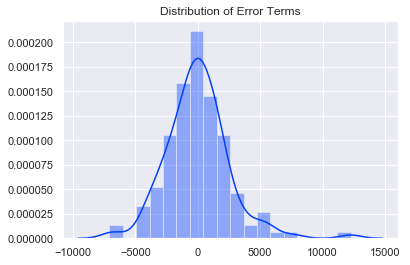

In [53]:
# y_pred based on model
y_train_pred = lr_model.predict(X_train_sm)

# Distribution of error terms
sns.set(palette="bright")

sns.distplot(y_train - y_train_pred)
plt.title("Distribution of Error Terms")

## Evaluation of Model

#### Transform/scale test dataframe

In [54]:
col2scale = ["wheelbase","carlength","carlength","carheight","curbweight","carwidth",
             "enginesize","boreratio","stroke","compressionratio",
            "horsepower","peakrpm","citympg","highwaympg","lbh"]

car_test[col2scale] = scaler.transform(car_test[col2scale])

C:\Users\rush2\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\rush2\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


#### Prediction on test set

In [55]:
# Create X_test, y_test set

X_test = car_test[selected_features]
y_test = car_test["price"]

# Add constant
X_test_sm = sm.add_constant(X_test)

C:\Users\rush2\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


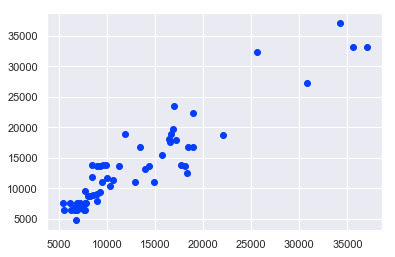

In [56]:
# Make prediction

y_test_pred = lr_model.predict(X_test_sm)

# Scatter plot
plt.scatter(y_test,y_test_pred)

#### Calculate r2 for test set

In [57]:
# R2 squared
print(round(r2_score(y_true = y_test,y_pred=y_test_pred),2))

0.86


#### Adding below lines  in case there is automated test case run

In [58]:
y_pred = y_test_pred.copy()
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8565624125737836

## Conclusion

## <font color=maroon>Features that drive the car price
             
1. aspiration - turbo car costlier than standard car (aspiration_turbo)
2. drivewheel - rear wheel drive costlier than otherr categories (drivewheel_rwd)
3. enginelocation - rear engine location is thrice as costlier as front (enginelocation_rear)
4. enginetype - dohcv are significant costlier (enginetype_dohcv)
4. fuel system - mpfi are coslier car (fuelsystem_mpfi)
5. bmw, mercury, porsche, buick and jaguar are costlier car ('carcompany_bmw','carcompany_buick','carcompany_jaguar').

## <font color=maroon> Equation for car price based on best fit line is
$ price = 4307.98 + 2118.5934 \times drivewheel(rwd) + 20500 \times enginelocation(rear) + 17160 \times carwidth + 1972.3109 \times fuelsystem(mpfi) + 11150 \times carcompany(bmw) + 12070 \times carcompany(buick) + 12420 \times carcompany(jaguar) $